<a href="https://colab.research.google.com/github/ZetaRR/Forbes-classification-of-billionaires/blob/main/ForbesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Source Type: API**

Link: https://rapidapi.com/snldnc-kpCtDKbxo_F/api/forbes-worlds-billionaires-list/pricing

In [3]:
from google.colab import drive, files
import json 
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [4]:
drive.mount('/drive', force_remount=False) # mounting drive

Mounted at /drive


For confidential reason, other dataframe is used to hide api key

In [6]:
api_key_df = pd.read_csv('/content/drive/MyDrive/forbess_api_key.csv') # 
api_key = api_key_df.iloc[0,:].apply(str).values
api_key = ' '.join([str(i) for i in api_key]) 

In [8]:
url = "https://forbes-worlds-billionaires-list.p.rapidapi.com/billionaires/2022" 

querystring = {"page":"1","size":"100"}

headers = {
	"X-RapidAPI-Host": "forbes-worlds-billionaires-list.p.rapidapi.com",
	"X-RapidAPI-Key": api_key
}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"personLists":[{"name":"Billionaires","year":2022,"month":4,"uri":"peter-woo","rank":100,"listUri":"billionaires","finalWorth":17000,"category":"Real Estate","otherCompensation":0,"person":{"name":"Peter Woo","uri":"peter-woo","imageExists":true,"squareImage":"https://specials-images.forbesimg.com/imageserve/620d2693995b45d70b8590b0/416x416.jpg?background=000000&cropX1=806&cropX2=1851&cropY1=642&cropY2=1687"},"visible":true,"personName":"Peter Woo","age":75,"country":"Hong Kong","city":"Hong Kong","source":"real estate","industries":["Real Estate"],"countryOfCitizenship":"Hong Kong","timestamp":1649102312855,"version":1,"naturalId":"faris/5/2022/4693","position":101,"imageExists":true,"selfMade":false,"status":"D","gender":"M","birthDate":-736041600000,"lastName":"Woo","firstName":"Peter","listDescription":"The World's Billionaires","date":1649116800000,"wealthList":false,"familyList":false,"squareImage":"https://specials-images.forbesimg.com/imageserve/620d2693995b45d70b8590b0/416x41

In [9]:
response = response.json()
df = pd.json_normalize(data=response['personLists'])
df.head()

,name,year,month,uri,rank,listUri,finalWorth,category,otherCompensation,visible,personName,age,country,city,source,industries,countryOfCitizenship,timestamp,version,naturalId,position,imageExists,selfMade,status,gender,birthDate,lastName,firstName,listDescription,date,wealthList,familyList,squareImage,bioSuppress,csfDisplayFields,suppressOnProfiles,bios,abouts,parentListUri,premiumProfile,person.name,person.uri,person.imageExists,person.squareImage,state,organization,title,selfMadeRank,residenceStateRegion,philanthropyScore,employment.name,employment.title,employment.government,employment.featuredExecutive,residenceMsa,employment.uri,numberOfSiblings,numberOfSiblingsEst,employment.totalEarnings,impactInvestor,employment.revenue,employment.revenueYear,bio,notableDeal,valueCreated,thumbnail,qas,employment.type,employment.website,employment.employees,employment.employeesYear,primaryIndustry,employment.budget,employment.budgetYear,portraitImage,landscapeImage,employment.assets,employment.assetsYear,totalCharitableDonation,charitableDonationPercentage
0,Billionaires,2022,4,peter-woo,100,billionaires,17000,Real Estate,0,True,Peter Woo,75.0,Hong Kong,Hong Kong,real estate,[Real Estate],Hong Kong,1649102312855,1,faris/5/2022/4693,101,True,False,D,M,-7.360416e+11,Woo,Peter,The World's Billionaires,1649116800000,False,False,https://specials-images.forbesimg.com/imageser...,False,"[rank, finalWorth, personName, bios, bio]",False,[Peter Woo was chairman of property developer ...,"[Woo's flagship properties, Harbour City in Ko...",billionaires,False,Peter Woo,peter-woo,True,https://specials-images.forbesimg.com/imageser...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Billionaires,2022,4,gianluigi-rafaela-aponte,102,billionaires,16800,Logistics,0,True,Gianluigi & Rafaela Aponte,81.0,Switzerland,Geneva,Shipping,[Logistics],Switzerland,1649102314266,1,faris/5/2022/7642,102,True,True,U,NaN,-9.313920e+11,Aponte,Gianluigi & Rafaela,The World's Billionaires,1649116800000,False,False,//specials-images.forbesimg.com/imageserve/5e7...,False,"[rank, finalWorth, personName, bios, bio]",False,"[A captain by training, Gianluigi Aponte enter...",[Gianluigi financed the acquisition of his fir...,billionaires,False,Gianluigi & Rafaela Aponte,gianluigi-rafaela-aponte,True,//specials-images.forbesimg.com/imageserve/5e7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Billionaires,2022,4,david-tepper,103,billionaires,16700,Finance & Investments,0,True,David Tepper,64.0,United States,Palm Beach,hedge funds,[Finance & Investments],United States,1649346211289,1,faris/5/2022/7809,103,True,True,U,M,-3.883680e+11,Tepper,David,The World's Billionaires,1649116800000,False,False,https://specials-images.forbesimg.com/imageser...,False,"[rank, finalWorth, personName, bios, bio]",False,"[David Tepper, arguably the greatest hedge fun...",[Tepper gifted $67 million to Carnegie Mellon ...,billionaires,False,David Tepper,david-tepper,True,https://specials-images.forbesimg.com/imageser...,Florida,Appaloosa Management,President and Founder,8.0,South,2.0,Appaloosa Management,President and Founder,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Billionaires,2022,4,renata-kellnerova,104,billionaires,16600,Finance & Investments,0,True,Renata Kellnerova & family,54.0,Czechia,Prague,"finance, telecommunications",[Finance & Investments],Czechia,1649102317358,1,faris/5/2022/247588,104,False,False,N,F,-7.879680e+10,Kellnerova,Renata,The World's Billionaires,1649116800000,False,False,NaN,False,"[rank, finalWorth, personName, bios, bio]",False,[Renata Kellnerova is the widow of Petr Kellne...,NaN,billionaires,False,Renata Kellnerova & family,renata-kellnerova,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [10]:
df['philanthropyScore'].value_counts()

1.0    128
2.0     97
3.0     42
4.0      9
5.0      7
Name: philanthropyScore, dtype: int64

In [11]:
df['employment.government'].value_counts()

False    179
Name: employment.government, dtype: int64

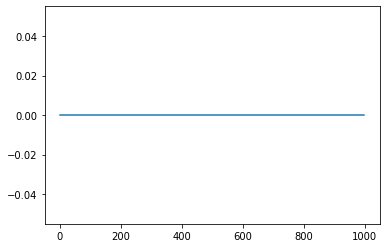

In [12]:
plt.plot(df['otherCompensation'])

Filtering columns that can help in making predictions

In [13]:
df = df[['finalWorth', 'age', 'country', 'city', 'countryOfCitizenship', 'selfMade', 'status', 'gender', 'philanthropyScore', 'category']] 

In [14]:
df.head()

,finalWorth,age,country,city,countryOfCitizenship,selfMade,status,gender,philanthropyScore,category
0,17000,75.0,Hong Kong,Hong Kong,Hong Kong,False,D,M,NaN,Real Estate
1,16800,81.0,Switzerland,Geneva,Switzerland,True,U,NaN,NaN,Logistics
2,16700,64.0,United States,Palm Beach,United States,True,U,M,2.0,Finance & Investments
3,16600,54.0,Czechia,Prague,Czechia,False,N,F,NaN,Finance & Investments
4,16600,82.0,United States,Eau Claire,United States,True,U,M,1.0,Fashion & Retail


In [15]:
df['category'].value_counts()

Finance & Investments         164
Technology                    130
Manufacturing                 111
Fashion & Retail               94
Food & Beverage                87
Real Estate                    73
Healthcare                     67
Diversified                    54
Energy                         42
Media & Entertainment          40
Automotive                     26
Service                        24
Metals & Mining                20
Telecom                        15
Logistics                      14
Sports                         14
Construction & Engineering     13
Gambling & Casinos             12
Name: category, dtype: int64

In [16]:
df = df[df['category'].map(df['category'].value_counts()) > 100]
print("Shape of Dataframe -->", df.shape)
df.head()

Shape of Dataframe --> (405, 10)


,finalWorth,age,country,city,countryOfCitizenship,selfMade,status,gender,philanthropyScore,category
2,16700,64.0,United States,Palm Beach,United States,True,U,M,2.0,Finance & Investments
3,16600,54.0,Czechia,Prague,Czechia,False,N,F,NaN,Finance & Investments
6,16500,86.0,United States,Indian Creek,United States,True,U,M,2.0,Finance & Investments
9,16400,58.0,United States,Palo Alto,United States,False,D,F,1.0,Technology
10,16300,69.0,United Kingdom,London,United Kingdom,True,D,M,NaN,Manufacturing


In [20]:
df.to_csv('/content/drive/MyDrive/forbes/forbes_df.csv', encoding='utf-8', index=False)